In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('A:/1 - DS phyton/учебные датасеты/Credit_card.csv')

In [59]:
df2 = pd.read_csv('A:/1 - DS phyton/учебные датасеты/Credit_card_label.csv')

In [60]:
#df

In [61]:
#df2

In [62]:
df = df.merge(df2[['Ind_ID', 'label']], on='Ind_ID', how='left')

In [63]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [64]:
#df.describe()

In [65]:
counts = df['GENDER'].value_counts()
#print(counts)

counts2 = df['Car_Owner'].value_counts()
#print(counts2)

counts3 = df['Propert_Owner'].value_counts()
#print(counts3)

counts4 = df['Type_Income'].value_counts()
#print(counts4)

counts5 = df['EDUCATION'].value_counts()
#print(counts5)

counts6 = df['Housing_type'].value_counts()
#print(counts6)

counts6 = df['Marital_status'].value_counts()
#print(counts6)

df = df.drop(['Type_Occupation', 'Ind_ID'], axis=1)


In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols =  ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Housing_type', 'Marital_status']


encoder = OneHotEncoder(
    sparse_output=False,   # use sparse=False if sklearn < 1.2
    handle_unknown='ignore'
)

encoded = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df.index
)

# Combine back with numerical columns
df_final = pd.concat(
    [df.drop(columns=categorical_cols), encoded_df],
    axis=1
)

In [68]:
#df_final

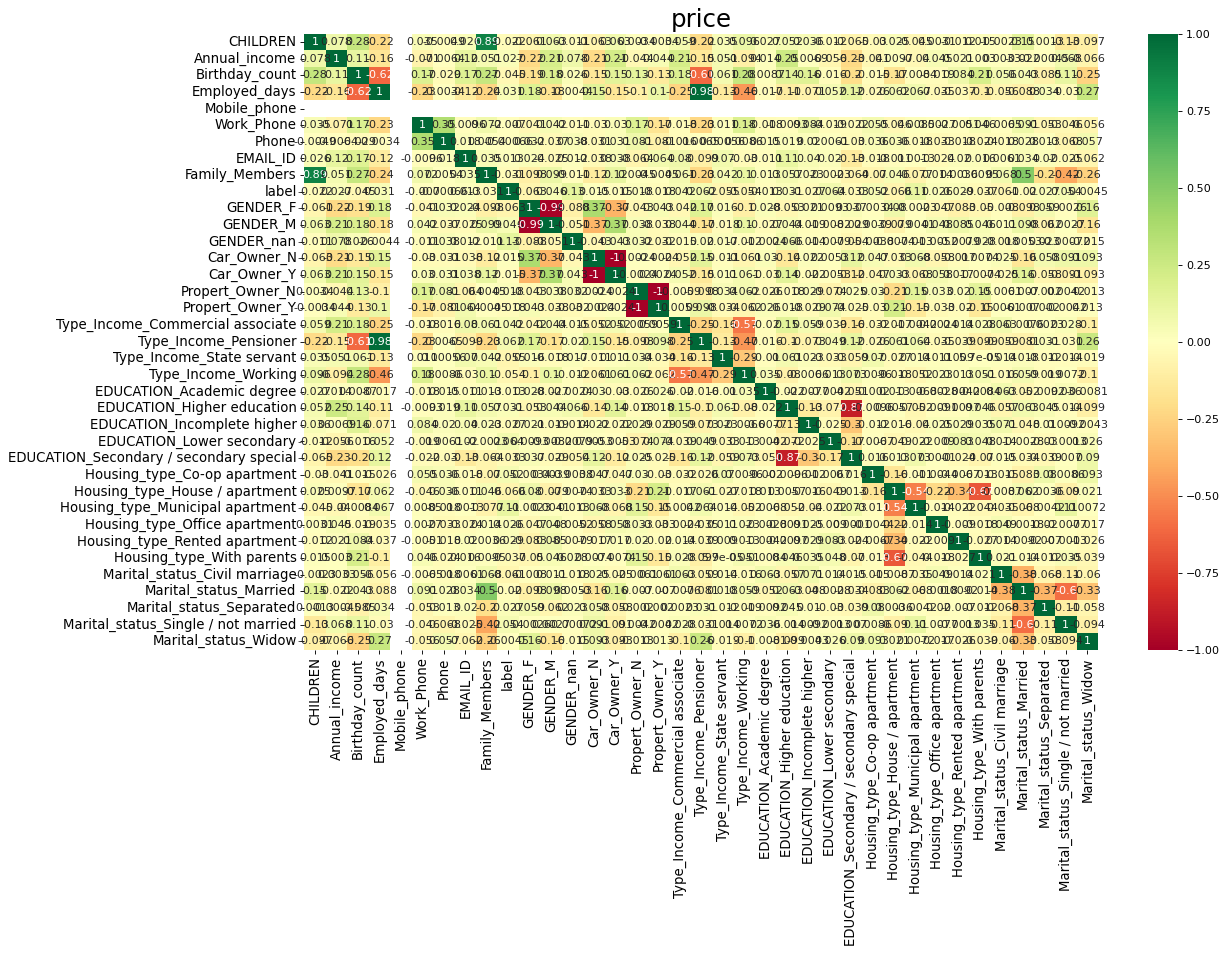

In [69]:
heatdf  = df_final

plt.figure(figsize=(16,10), dpi= 80)
sns.heatmap(df_final.corr(), xticklabels=heatdf.corr().columns, yticklabels=heatdf.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('price', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [70]:
df_final.columns

Index(['CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days',
       'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members',
       'label', 'GENDER_F', 'GENDER_M', 'GENDER_nan', 'Car_Owner_N',
       'Car_Owner_Y', 'Propert_Owner_N', 'Propert_Owner_Y',
       'Type_Income_Commercial associate', 'Type_Income_Pensioner',
       'Type_Income_State servant', 'Type_Income_Working',
       'EDUCATION_Academic degree', 'EDUCATION_Higher education',
       'EDUCATION_Incomplete higher', 'EDUCATION_Lower secondary',
       'EDUCATION_Secondary / secondary special',
       'Housing_type_Co-op apartment', 'Housing_type_House / apartment',
       'Housing_type_Municipal apartment', 'Housing_type_Office apartment',
       'Housing_type_Rented apartment', 'Housing_type_With parents',
       'Marital_status_Civil marriage', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow'],
      dtype='object')

In [71]:
# model

from sklearn.model_selection import train_test_split
y = df_final['label']
x = df_final.drop(columns = ['label'])

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth = 5)

cross_val_score(clf, x_train, y_train, cv=10)

array([0.87903226, 0.88709677, 0.87903226, 0.86290323, 0.88709677,
       0.87903226, 0.87903226, 0.88709677, 0.89430894, 0.8699187 ])

In [73]:
clf.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [74]:
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.8957996768982229
0.8903225806451613


In [75]:
#plt.figure(figsize=(12,8))

#from sklearn import tree

#tree.plot_tree(clf.fit(x_train, y_train)) 

In [76]:
counts = df_final['label'].value_counts()
print(counts)

label
0    1373
1     175
Name: count, dtype: int64


In [100]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

# ============= БАЗОВЫЙ КЛАССИФИКАТОР (код в виде функции) =============
def simple_tree_predict(X_train, y_train, X_test):
    """исходный код как одна функция"""
    best_col = None
    best_acc = 0
    best_rule = None
    best_value = None
    
    for col in X_train.columns:
        unique_vals = X_train[col].unique()
        
        if len(unique_vals) <= 2:
            # Бинарный признак
            pred = X_train[col].astype(int)
            acc = (pred == y_train).mean()
            
            pred_inv = 1 - X_train[col].astype(int)
            acc_inv = (pred_inv == y_train).mean()
            
            if acc_inv > acc:
                acc = acc_inv
                rule = "=="
                value = 0
            else:
                rule = "=="
                value = 1
        else:
            # Непрерывный признак
            threshold = X_train[col].mean()
            pred = (X_train[col] > threshold).astype(int)
            acc = (pred == y_train).mean()
            rule = ">"
            value = threshold
        
        if acc > best_acc:
            best_acc = acc
            best_col = col
            best_rule = rule
            best_value = value
    
    # Делаем предсказания на тесте
    if best_rule == "==":
        if best_value == 1:
            predictions = X_test[best_col].astype(int)
        else:
            predictions = 1 - X_test[best_col].astype(int)
    else:
        predictions = (X_test[best_col] > best_value).astype(int)
    
    return predictions, (best_col, best_rule, best_value, best_acc)

#  BAGGING 
def simple_bagging(X_train, y_train, X_test, n_estimators=10):
    """Простой бэггинг"""
    all_predictions = []
    models_info = []
    
    for i in range(n_estimators):
        # 1. Бутстрап (выборка с повторениями)
        X_boot, y_boot = resample(X_train, y_train, random_state=42+i)
        
        # 2. Обучаем базовую модель на бутстрап-выборке
        pred, model_info = simple_tree_predict(X_boot, y_boot, X_test)
        
        # 3. Сохраняем предсказания и информацию о модели
        all_predictions.append(pred)
        models_info.append(model_info)
        
    
    # 4. Агрегируем предсказания (голосование)
    # Преобразуем в numpy для удобства
    pred_array = np.array(all_predictions)
    
    # Голосование большинством (mode)
    final_predictions = pd.Series([pd.Series(pred_array[:, i]).mode()[0] 
                                   for i in range(pred_array.shape[1])])
    
    return final_predictions, models_info


if __name__ == "__main__":
    # данные
    y = df_final['label']
    x = df_final.drop(columns=['label'])
    
    # Разделение данных
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.5, random_state=42
    )
    
    # Заполняем пропуски
    x_train_filled = x_train.fillna(0)
    x_test_filled = x_test.fillna(0)
    
    print("БАЗОВАЯ МОДЕЛЬ (ваш исходный код)")
    
    # Оригинальная модель
    pred_base, info = simple_tree_predict(x_train_filled, y_train, x_test_filled)
    base_acc = accuracy_score(y_test, pred_base)
    print(f"Точность на тесте: {base_acc:.1%}")
    
    print(f"BAGGING (10 моделей)")
    
    # Bagging
    bagging_pred, bagging_models = simple_bagging(
        x_train_filled, y_train, x_test_filled, n_estimators=10
    )
    
    bagging_acc = accuracy_score(y_test, bagging_pred)
    print(f"Точность на тесте: {bagging_acc:.1%}")
    
    
     # Посмотрим на разнообразие моделей
    unique_rules = set()
    for model in bagging_models:
        col, rule, value, acc = model
        unique_rules.add(f"{col} {rule}")
    
    print(f"Уникальных правил: {len(unique_rules)} из {len(bagging_models)}")
    print(f"Уникальные правила: {unique_rules}")  # <-- ДОБАВЛЕНА ЭТА СТРОЧКА

БАЗОВАЯ МОДЕЛЬ (ваш исходный код)
Точность на тесте: 89.0%
BAGGING (10 моделей)
Точность на тесте: 89.0%
Уникальных правил: 2 из 10
Уникальные правила: {'Mobile_phone ==', 'GENDER_nan =='}
